# Chem 30324, Spring 2019, Homework 5
Due Febrary 25, 2020

## Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.

<img src="https://github.com/wmfschneider/CHE30324/blob/master/Homework/imgs/HW5-1.png?raw=1"  width="360">

### 1. Plot out the energies of the $n = 1 – 6$ particle-in-a-box states for ethylene (2 carbon chain), butadiene (4 carbon chain), hexatriene (6 carbon chain), octatetraene (8 carbon chain), and decapentaene (10 carbon chain). What happens to the spacing between energy levels as the molecule gets longer? 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

E = []
l = 1.4e-10 #m
hbar = 1.05457e-34 #J*s
m = 9.109e-31 #kg 
N = [1,3,5,7,9] #N = number of C-C bonds

for n in range (1,7):
  for i in N:
    e = (n**2*np.pi**2*hbar**2*6.2415e18)/(2*m*(i*l)**2)
    E.append(e)

plt.scatter(N,E[0:5], label = "n=1")
plt.scatter(N,E[5:10], label = "n=2")
plt.scatter(N,E[10:15], label = "n=3")
plt.scatter(N,E[15:20], label = "n=4")
plt.scatter(N,E[20:25], label = "n=5")
plt.scatter(N,E[25:30], label = "n=6")

plt.xticks(N, ["Ethylene", "Butadiene", "Hexatriene", "Octatriene", "Decapentaene"], rotation = 'vertical')
plt.ylabel('Energy (eV)')
plt.title('Energies of n = 1-6 Particle in a Box')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

### 2. Plot out the normalized $n = 2$ particle-in-a-box wavefunction for an electron in butadiene and the normalized $n = 2$ probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

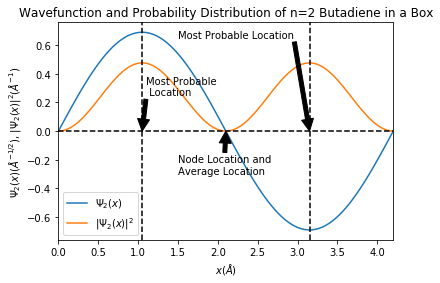

In [4]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.4*3 #Angstrom
x = np.linspace(0,l,100)
psi = (2/l)**.5*np.sin(2*np.pi*x/l) #normalized wave function

plt.plot(x,psi,label = '$\Psi_2(x)$')
plt.plot(x,psi**2,label = '$|\Psi_2(x)|^2$')
plt.xlim(0,l)
plt.xlabel('$x(\AA)$')
plt.ylabel('$\Psi_2(x)(\AA^{-1/2})$, $|\Psi_2(x)|^2(\AA^{-1})$')
plt.title('Wavefunction and Probability Distribution of n=2 Butadiene in a Box')

plt.axhline(y=0, color = 'k', linestyle = '--')
plt.axvline(x=l/4, color = 'k', linestyle = '--')
plt.axvline(x=3*l/4, color = 'k', linestyle = '--')
plt.annotate('Most Probable\n Location',xy=(l/4,0),xytext=(1.1,.25), arrowprops = dict(facecolor = 'black'))
plt.annotate('Most Probable Location',xy=(3*l/4,0),xytext=(1.5,.65), arrowprops = dict(facecolor = 'black'))
plt.annotate('Node Location and\nAverage Location',xy=(l/2,0),xytext=(1.5,-.3), arrowprops = dict(facecolor = 'black'))
plt.legend()
plt.show()

### 3. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the $n = 1$ and two in the $n = 2$ levels. Compare the wavelength of light (in nm) necessary to promote (“excite”) one electron from either of these levels to the empty $n = 3$ level.

In [5]:
import numpy as np
l = 3*1.4e-10 #m, length of the box
hbar = 1.05457e-34 #J*s
me = 9.109e-31 #kg
E13 = ((3**2-1**2)*np.pi**2*hbar**2/2/me/l**2)*6.2415e18
E23 = ((3**2-2**2)*np.pi**2*hbar**2/2/me/l**2)*6.2415e18
lambda13 = 1240/E13 #nm
lambda23 = 1240/E23 #nm
print('From n=1 to n=3, light must have wavelength = {0:.2f}nm. \nFrom n=2 to n=3, light must have wavelength = {1:.2f}nm.'.format(lambda13,lambda23))

From n=1 to n=3, light must have wavelength = 72.71nm. 
From n=2 to n=3, light must have wavelength = 116.34nm.


### 4. The probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert \hat{x}\rvert\psi_{final}\rangle\rvert^2$. Contrast the relative probabilities of an electron jumping from $n = 1$ to $n = 3$ and from $n = 2$ to $n = 3$ levels. Can you propose any general rules about “allowed” and "forbidden" jumps?

$|\langle\psi_1|\hat{x}|\psi_3\rangle|^2$ = $(\int_{0}^{L} \frac{sin(\pi x)}{L} * x *  \frac{sin(3\pi x)}{L} dx)^2$

If we assume L = 1 m and integrate, this integral is equal to zero. Therefore, it is "forbidden". 

$|\langle\psi_2|\hat{x}|\psi_3\rangle|^2$ = $(\int_{0}^{L} \frac{sin(2\pi x)}{L} * x *  \frac{sin(3\pi x)}{L} dx)^2$

If we assume L = 1 m and integrate, this integral is not equal to zero. Therefore, it is "allowed".

### 5. Consider the reaction of two ethylene molecules to form butadiene:
<img src="https://github.com/wmfschneider/CHE30324/blob/master/Homework/imgs/HW5-2.png?raw=1"  width="360">

### As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [6]:
import numpy as np

#Heat of Formatin data from NIST
ethylene = 52.4 #kJ/mol
butadiene = 108.8 #kJ/mol
print('According to NIST, the energy of reaction =', butadiene - 2*ethylene, 'kJ/mol.')

l = 1.4e-10 #m, length of C-C bond
hbar = 1.05457e-34 #J*s
me = 9.109e-31 #kg
ethyl_n = 4*1**2 #4 n1 electrons
buta_n = 2*(1**2+2**2) #2 n1 + 1 n2 electrons

Erxn = (buta_n*np.pi**2*hbar**2)/(2*me*(3*l)**2) - (ethyl_n*np.pi**2*hbar**2)/(2*me*l**2) #J/molecule
E_rxn = Erxn*6.022e23/1000 #kJ/mol
print('Using the particle in a box method, the energy of reaction =',round(E_rxn,1),'kJ/mol. ')
print('This model isn\'t perfect beacause the potential is not zero or infinite in real life, \n and the model ignores interaction between nucleus and electrons.')

According to NIST, the energy of reaction = 4.0 kJ/mol.
Using the particle in a box method, the energy of reaction = -5347.7 kJ/mol. 
This model isn't perfect beacause the potential is not zero or infinite in real life, 
 and the model ignores interaction between nucleus and electrons.


### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

When wall potential drops from infinity to finite value, 

1. Number of bound states/levels will drop from infinite to finite (molecules will eventually escape the box at high enough energy).

2. It's possible for electrons to tunnel into once forbidden region. 

3. Energies of bound states decreases.

## Quantum mechanics of vibrating NO.
### The diatomic nitric oxide (NO) is an unusual and important molecule. It has an odd number of electrons, which is a rarity for stable molecule. It acts as a signaling molecule in the body, helping to regulate blood pressure, is a primary pollutant from combustion, and is a key constituent of smog. It exists in several isotopic forms, but the most common, ${}^{14}$N= ${}^{16}$O, has a bond length of 1.15077 Å and vibrational force constant of 1594.8 N/m.

### 7. Compute the **reduced mass** $\mu$ (amu), **harmonic vibrational frequency** (cm$^{-1}$), and **zero point vibrational energy** (kJ/mol) of  ${}^{14}$N= ${}^{16}$O.  Recall $1/\mu=1/M_\text{N} + 1/M_\text{O}$.

In [7]:
import numpy as np

MN = 14 #amu
MO = 16 #amu
k = 1594.8 #N/m
l = 1.15077 #Angstroms
conv = 6.022e26 #amu to kg
h = 6.626e-34 # m^2 kg/s
c = 299792458 #m/s, Speed of Light
N = 6.022e23 #molecules/mole

Mred = 1/(1/MN+1/MO) #amu
print('The reduced mass is',round(Mred,2), 'amu.')

vibfreq = 1/(2*np.pi)*np.sqrt(k/Mred*conv/(c**2)/(100**2)) #cm^-1

print('The harmonic vibrational frequency is',round(vibfreq,2), 'cm^-1.')

E0 = .5*h*vibfreq*c*100*N/1000
print('The zero point vibrational energy is', round(E0,2),'kJ/mol.')


The reduced mass is 7.47 amu.
The harmonic vibrational frequency is 1903.97 cm^-1.
The zero point vibrational energy is 11.39 kJ/mol.


### 8. Calculate the classical minimum and maximum values of the $^{14}$N=$^{16}$O bond length for a molecule in the ground vibrational state. Hint: Calculate the classical limits on $x$, the value of $x$ at which the kinetic energy is 0 and thus the total energy equals the potential energy.

In [8]:
MN = 14 #amu
MO = 16 #amu
k = 1594.8 #N/m
hbar = 1.05457e-34 #J*s
conv = 6.022e26 #amu to kg
l = 1.15077e-10 #m

alpha = (hbar**2/Mred/k*conv)**0.25 #m

rmax = l+alpha #m
rmin = l-alpha #m

print('Classical bond length maximum is %e m.'%(rmax))
print('Classical bond length minimum is %e m.'%(rmin))




Classical bond length maximum is 1.199468e-10 m.
Classical bond length minimum is 1.102072e-10 m.


### 9. The normalized ground vibrational wavefunction of N=O can be written 

$$\Psi_{\upsilon=0}(x) = \left ({\frac{1}{\alpha\sqrt{\pi}}}\right )^{1/2}e^{-x^2/2\alpha^2}, \quad x = R-R_{eq}, \quad \alpha = \left ({\frac{\hbar^2}{\mu k}}\right )^{1/4}$$

### where $x = R-R_{eq}$.  Calculate the probability for an ${}^{14}N={}^{16}O$ molecule to have a bond length outside the classical limits. This is an example of quantum mechanical tunneling. 

In [9]:
from sympy import *
a = 1 # in this case, a can be any number
x = Symbol('x')
pi = integrate(1/a/sqrt(pi)*exp(-x**2/a**2),(x,-a,a))
print('The probability of being inside the classical limits is:')
pprint(pi)
print('Therefore, the probability of being outside the classical limits is')
pprint(1-pi)
print('This is equal to 0.1523.')



The probability of being inside the classical limits is:
1.0⋅erf(1)
Therefore, the probability of being outside the classical limits is
1 - 1.0⋅erf(1)
This is equal to 0.1523.


### 10. The *gross selection rule* for whether light can excite a vibration of a molecule is that the dipole moment of the molecule must change as it vibrates.  Based on this criterion, do you expect NO to exhibit an absorption vibrational spectrum? 

NO will exhibit an infrared spectrum. Because the molecule is heteronuclear (two ends are not the same), it has a dipole moment.  Stretching the bond will change the dipole moment, so the molecule satisfies the gross selection rule.

### 11. The *specific selection rule* for whether light can excite a vibration of a molecule is that $\Delta v = \pm 1$.  At ambient temperature, what initial and final vibrational states would contribute most significantly to an NO vibrational spectrum? Justify your answer. (*Hint:* What does the Boltzmann distribution say about the probability to be in each $\nu$ state?)

At 273 K, the most occupied vibrational state is v = 0. Therefore, it will contribute most significantly to the NO spectrum.

Quantitatively, we can prove this using the Boltzmann distribution:

In [10]:
import numpy as np
h = 6.626e-34 # J*s
c = 299792458 #m/s, Speed of Light
T = 273 #K
k = 1.38e-23 #J/K

P = []
for v in [0,1,2,3]:
  E = (v+0.5)*h*c*vibfreq*100
  P.append(np.exp(-E/k/T))
print('The population of v = [0,1,2,3] is [%.2f,%.2e,%.2e,%.2e]'%(P[0]/sum(P),P[1]/sum(P),P[2]/sum(P),P[3]/sum(P)))

The population of v = [0,1,2,3] is [1.00,4.37e-05,1.91e-09,8.32e-14]


### 12. Based on your answers to questions 10 and 11, what do you expect the vibrational spectrum of an ${}^{14}N={}^{16}O$ molecule to look like? If it has a spectrum, in what region of the spectrum does it absorb (e.g., ultraviolet, x-ray, ...)?

There is only one peak that corresponds to the v0 to v=1 transition. Vibrational frequency is 1904 cm^-1, which is in the IR region. 

## Two-dimensional harmonic oscillator
### Imagine an H atom embedded in a two-dimensional sheet of MoS$_2$.  The H atom vibrates like a two-dimensional harmonic oscillator with mass 1 amu and force constants $k_x$ and $k_y$ in the two directions.

### 13. Write down the Schr&ouml;dinger equation for the vibrating H atom. Remember to include any boundary conditions on the solutions.

$-{\frac{\hbar}{2m_e}}{\frac{\partial^2\psi(x,y)}{\partial x^2}}-{\frac{\hbar}{2m_e}}{\frac{\partial^2\psi(x,y)}{\partial y^2}}+{\frac{1}{2}k_xx^2\psi(x，y)}+{\frac{1}{2}k_yy^2\psi(x，y)}=E\psi(x,y) $

$\lim_{x\rightarrow\pm\infty} \psi(x,y)=0\qquad \lim_{y\rightarrow\pm\infty} \psi(x,y)=0$

### 14. The  Schr&ouml;dinger equation is *seperable*, so the wavefunctions are products of one-dimensional wavefunctions and the eigenenergies are sums of corresponding one-dimensional energies.  Derive an expression for the H atom vibrational energy states, assuming $k_x = k_y/4 = k$.

Because it is separable, energies in $x$ and $y$ are additive.

$E = E_x + E_y = (v_x+\frac{1}{2})h\nu_x + (v_x+\frac{1}{2})h\nu_y$

$\nu_x= \frac{1}{2\pi}\sqrt{\frac{k}{m}}\qquad \nu_y= \frac{1}{2\pi}\sqrt{\frac{4k}{m}} = 2\nu_x$

$E = (v_x+\frac{1}{2})hν+ 2(v_y+\frac{1}{2})hν=(v_x+2v_y+\frac{3}{2})hν,ν=\frac{1}{2\pi}\sqrt{\frac{k}{\mu}}$


### 15. A spectroscopic experiment reveals that the spacing between the first and second energy levels is 0.05 eV. What is $k$, in N/m?

In [11]:
import numpy as np
del_E = 0.05*1.60218e-19 #J
h = 6.626e-34 #Planck constant in m^2 kg / s
m = 1.66054e-27 #kg
freq = del_E/h #/s
k = (2*np.pi*freq)**2*m #kg/m/s^2

print('Force constant k is ',round(k,2),'N/m')

Force constant k is  9.58 N/m


### 16. What are the *energies* and *degeneracies* of the four lowest-energy vibrational levels of the H atom?

|Energy|Degeneracy|($v_x,v_y$)|
|------|----------|-------|
|$\frac{3}{2}hν$|1|(0,0)|
|$\frac{5}{2}hν$|1|(1,0)|
|$\frac{7}{2}hν$|2|(0,1),(2,0)|
|$\frac{9}{2}hν$|2|(1,1),(3,0)|

Where $hν$ is = 0.05 eV.

$$ E(0,0) = \frac{1}{2} h \nu_x + \frac{1}{2} h \nu_y  = \frac{3h}{4\pi} \sqrt\frac{k}{m} $$
$$ E(1,0) = \frac{3}{2} h \nu_x + \frac{1}{2} h \nu_y  = \frac{5h}{4\pi} \sqrt\frac{k}{m} $$
$$ E(0,1) = \frac{1}{2} h \nu_x + \frac{3}{2} h \nu_y = \frac{7h}{4\pi} \sqrt\frac{k}{m} $$
$$ E(1,1) = \frac{3}{2} h \nu_x + \frac{3}{2} h \nu_y = \frac{9h}{4\pi} \sqrt\frac{k}{m} $$
$$ E(2,0) = \frac{5}{2} h \nu_x + \frac{1}{2} h \nu_y = \frac{7h}{4\pi} \sqrt\frac{k}{m} $$
$$ E(3,0) = \frac{7}{2} h \nu_x + \frac{1}{2} h \nu_y = \frac{9h}{4\pi} \sqrt\frac{k}{m} $$